# Random Forest

1. Random Forest의 하이퍼 파라미터 찾기
2. Random Forest의 feature importance 계산 및 비교하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

import warnings
warnings.simplefilter("ignore")

- trn_X_20231211_final_col_01_transformed.csv, trn_y_20231211_final_col_01_transformed.csv 데이터 셋을 사용

In [34]:
# 사용하실 데이터의 주소를 넣어주면 됩니다.
X_trn = pd.read_csv("/home/sangjun/work/temp/trn_X_20231211_final_col_01_transformed.csv")
X_origin = X_trn.copy()
y_trn = pd.read_csv("/home/sangjun/work/temp/trn_y_20231211_final_col_01_transformed.csv")
X_test = pd.read_csv("/home/sangjun/work/temp/tst_X_20231211_final_col_01_transformed.csv")
y_test = pd.read_csv("/home/sangjun/work/temp/tst_y_20231211_final_col_01_transformed.csv")

In [4]:
X_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26852 entries, 0 to 26851
Columns: 208 entries, age to DI3_pt_8.0
dtypes: bool(170), float64(38)
memory usage: 12.1 MB


In [5]:
X_over = X_trn
y_over = y_trn

In [6]:
X_over.shape, y_over.shape,

((26852, 208), (26852, 1))

- RandomUnderSampler(sampling_strategy=0.5, random_state=42)

## 1. Random Forest의 하이퍼 파라미터 찾기

In [7]:
# 5가지의 scoring을 볼 예정
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 기존 random으로 추출한 초기 하이퍼 파라미터 값 n_estimators=82, max_depth=9 을 기준으로 depth와 n_estimators를 조정해보기
clf1 = RandomForestClassifier(n_estimators=82, max_depth=2, random_state=2023)
clf2 = RandomForestClassifier(n_estimators=82, max_depth=9, random_state=2023)
clf3 = RandomForestClassifier(n_estimators=82, max_depth=20, random_state=2023)
clf4 = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=2023)
clf5 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)
clf6 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=2023)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

In [8]:
results = cross_validate(clf1, X_over, y_over, scoring=scoring, cv=cv) # 5fold
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.679413,0.061890,0.690188,0.725187,0.612291,0.663974,0.773276
1,0.612362,0.061476,0.685161,0.717724,0.610573,0.659827,0.757890
2,0.609922,0.062130,0.679702,0.713779,0.600000,0.651963,0.754221
3,0.601503,0.062749,0.695158,0.726448,0.626071,0.672535,0.766298
4,0.598796,0.060793,0.696089,0.728416,0.625326,0.672946,0.774489
mean,0.620399,0.061808,0.689260,0.722311,0.614852,0.664249,0.765235
std,0.033469,0.000731,0.006900,0.006255,0.010966,0.008872,0.009038


In [9]:
results = cross_validate(clf2, X_over, y_over, scoring=scoring, cv=cv) # 5fold
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,2.133923,0.121917,0.783839,0.814097,0.735568,0.772843,0.865193
1,2.129189,0.122871,0.770620,0.796977,0.726359,0.760031,0.848903
2,2.138000,0.120282,0.766294,0.791599,0.722905,0.755694,0.845586
3,2.186727,0.121204,0.780633,0.805432,0.740037,0.771351,0.858831
4,2.154007,0.121994,0.780074,0.804947,0.739292,0.770724,0.858522
mean,2.148369,0.121653,0.776292,0.802610,0.732832,0.766129,0.855407
std,0.023384,0.000968,0.007454,0.008637,0.007771,0.007738,0.007999


In [10]:
results = cross_validate(clf3, X_over, y_over, scoring=scoring, cv=cv) # 5fold
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,4.025340,0.208875,0.806368,0.835031,0.763501,0.797665,0.893718
1,4.008043,0.209193,0.803202,0.832042,0.759866,0.794318,0.886455
2,4.023728,0.219675,0.794041,0.820024,0.753445,0.785326,0.879774
3,3.978730,0.217373,0.806890,0.838259,0.760521,0.797500,0.891125
4,4.009851,0.207257,0.809311,0.840788,0.763128,0.800078,0.894484
mean,4.009138,0.212475,0.803962,0.833229,0.760092,0.794978,0.889111
std,0.018720,0.005630,0.005958,0.008085,0.004039,0.005770,0.006091


In [11]:
results = cross_validate(clf4, X_over, y_over, scoring=scoring, cv=cv) # 5fold
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,2.486059,0.143212,0.805809,0.831851,0.766480,0.797829,0.888748
1,2.473473,0.142630,0.800968,0.827195,0.760983,0.792709,0.882629
2,2.451585,0.136767,0.789385,0.814066,0.750093,0.780771,0.875212
3,2.449715,0.143132,0.805587,0.831783,0.766108,0.797596,0.888060
4,2.440961,0.143296,0.804842,0.831779,0.764246,0.796584,0.890046
mean,2.460358,0.141807,0.801318,0.827335,0.761582,0.793098,0.884939
std,0.018702,0.002829,0.006952,0.007681,0.006781,0.007191,0.006129


In [12]:
results = cross_validate(clf5, X_over, y_over, scoring=scoring, cv=cv) # 5fold
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,4.809990,0.248691,0.808974,0.838433,0.765363,0.800234,0.895524
1,4.899075,0.257423,0.803016,0.834429,0.756143,0.793359,0.887688
2,4.890341,0.252786,0.799814,0.825121,0.760894,0.791707,0.880727
3,4.860742,0.244464,0.808007,0.840329,0.760521,0.798436,0.893370
4,4.825979,0.243774,0.813035,0.846884,0.764246,0.803446,0.895951
mean,4.857225,0.249427,0.806569,0.837039,0.761433,0.797436,0.890652
std,0.038948,0.005752,0.005194,0.008040,0.003622,0.004858,0.006451


In [13]:
results = cross_validate(clf6, X_over, y_over, scoring=scoring, cv=cv) # 5fold
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,9.864686,0.532720,0.810464,0.841179,0.765363,0.801482,0.898217
1,9.673702,0.486263,0.805623,0.839818,0.755398,0.795374,0.890734
2,9.669689,0.485218,0.801862,0.834503,0.753073,0.791699,0.886375
3,9.609889,0.482966,0.808194,0.841801,0.759032,0.798277,0.894818
4,9.719357,0.457183,0.815270,0.850228,0.765363,0.805566,0.898758
mean,9.707465,0.488870,0.808282,0.841506,0.759646,0.798480,0.893780
std,0.096109,0.027303,0.005047,0.005660,0.005635,0.005359,0.005236


- Random Forest의 하이퍼 파라미터를 n_estimators=100, max_depth=20로 고정

In [14]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)
# StratifiedKFold를 사용함

# 교차 검증
results = cross_validate(clf, X_over, y_over, scoring=scoring, cv=cv) # 5fold

# 결과 출력
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,4.788253,0.240870,0.808974,0.838433,0.765363,0.800234,0.895524
1,4.779167,0.254956,0.803016,0.834429,0.756143,0.793359,0.887688
2,4.833319,0.241724,0.799814,0.825121,0.760894,0.791707,0.880727
3,4.840193,0.241331,0.808007,0.840329,0.760521,0.798436,0.893370
4,4.864393,0.258347,0.813035,0.846884,0.764246,0.803446,0.895951
mean,4.821065,0.247446,0.806569,0.837039,0.761433,0.797436,0.890652
std,0.036143,0.008494,0.005194,0.008040,0.003622,0.004858,0.006451


- 고정된 파라미터로 test데이터셋 맞춰보기

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# RandomForestClassifier 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)
model.fit(X_over, y_over)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
y_test = y_test["depressed"].ravel()

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output_df.to_csv('output.csv', index=False)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4769  222]
 [ 174   61]]


In [36]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      4991
         1.0       0.22      0.26      0.24       235

    accuracy                           0.92      5226
   macro avg       0.59      0.61      0.60      5226
weighted avg       0.93      0.92      0.93      5226



역시 불균형 때문에 정확도가 크지만 f1, auroc의 스코어가 낮은 값이 나옴

In [37]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / sum(sum(conf_matrix))
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9242250287026407
Precision: 0.21554770318021202
Recall: 0.25957446808510637
F1 Score: 0.23552123552123552
ROC AUC Score: 0.6075472019848493


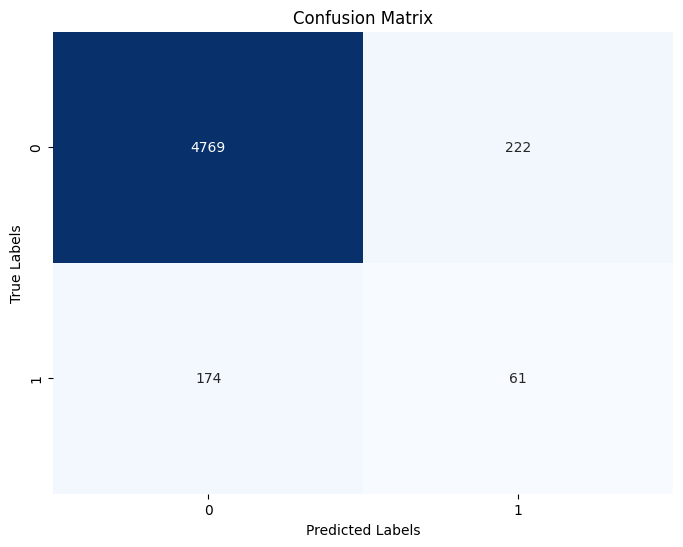

In [38]:
import seaborn as sns

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 2. Random Forest의 feature importance 계산 및 비교하기

각 현재 모델에서 사용된 feature의 Top5를 보고 각각을 하나씩 빼보는 실험 및 시각화를 한다.

In [ ]:
def importance(X_over, y_over):
    '''
    feature의 importance를 계산하기 위한 함수

    
    '''
    # 사용 모델
    model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)

    model.fit(X_over, y_over)

    # Feature 중요도 계산
    feature_importances = model.feature_importances_

    # 중요도가 0.01 이상인 feature만 선택
    selected_features = X_over.columns[feature_importances >= 0.01]

    # 중요도를 DataFrame으로 변환
    rf_feature_importance_df = pd.DataFrame({
        'Feature': X_over.columns,
        'Importance': feature_importances
    })

    selected_idx = np.argsort(feature_importances[feature_importances >= 0.01])[::-1]
    return [feature_importances,selected_features,selected_idx, rf_feature_importance_df]

In [ ]:
def plot_importance(feat_importance):
    '''
    feature의 importance를 0.01보다 높은 값만 bar그래프를 그리는 함수
    
    '''
    plt.bar(range(len(feat_importance[1])), feat_importance[0][feat_importance[0] >= 0.01][feat_importance[2]], align="center")
    plt.xticks(range(len(feat_importance[1])), feat_importance[1][feat_importance[2]], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Feature Importance in Random Forest Model (Importance >= 0.01)")
    plt.show()


- 기존 모델에 X_over, y_over를 fitting했을 때 feature의 importance를 계산

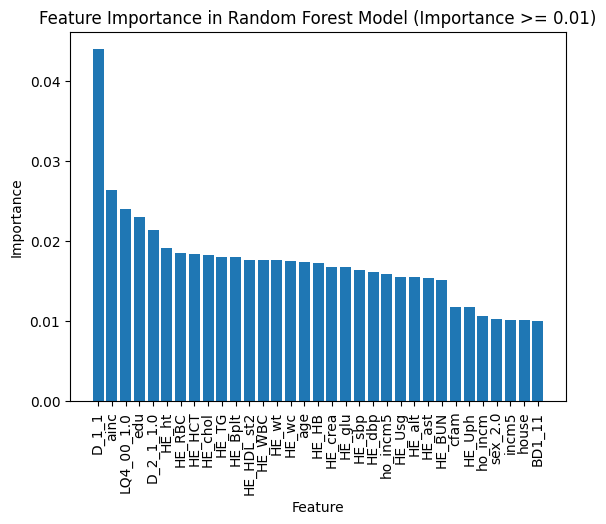

In [ ]:
feat_importance = importance(X_over,y_over)
plot_importance(feat_importance)

- 앞선 그래프에서 TOP 5를 정헤진 features ["D_1_1","ainc","LQ4_00_1.0","edu","D_2_1_1.0"] 다섯가지를 각각 빼보면서 importance에 영향이 있는지 확인해봅니다.

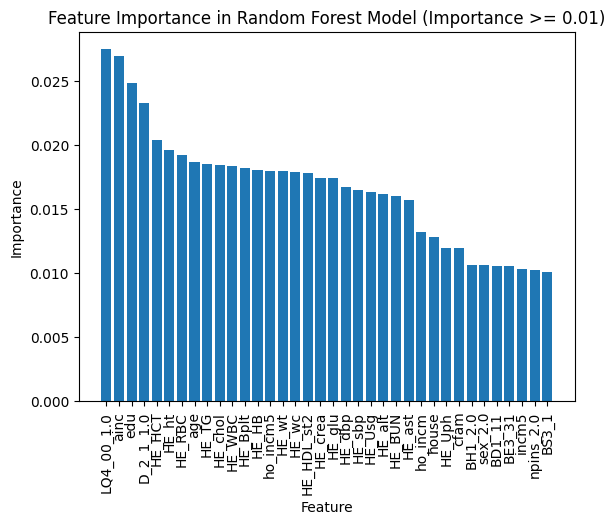

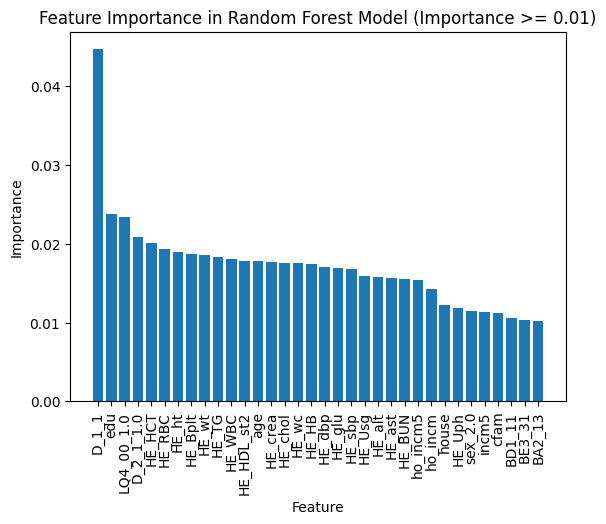

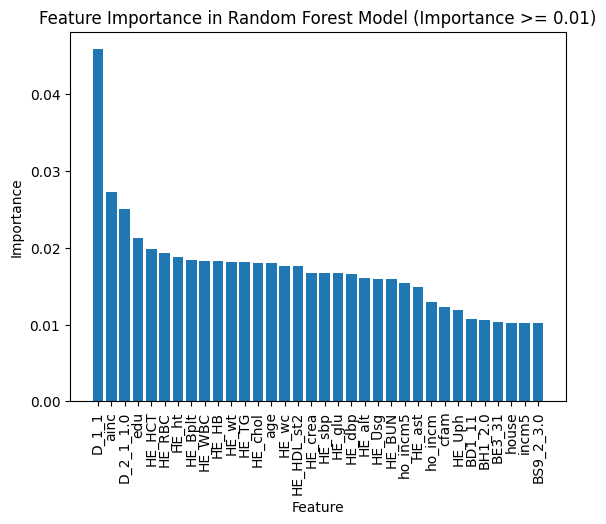

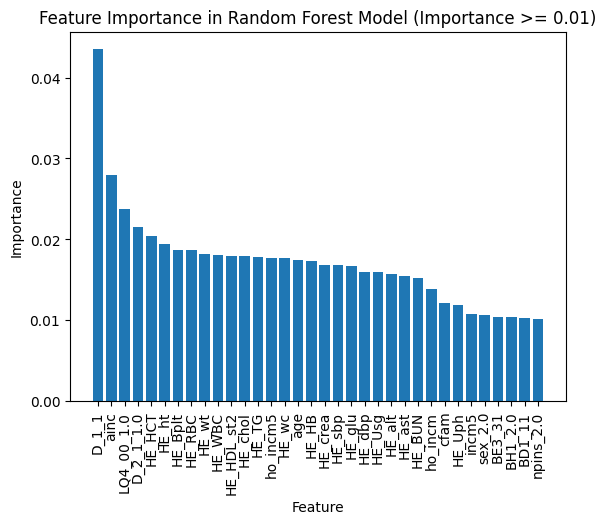

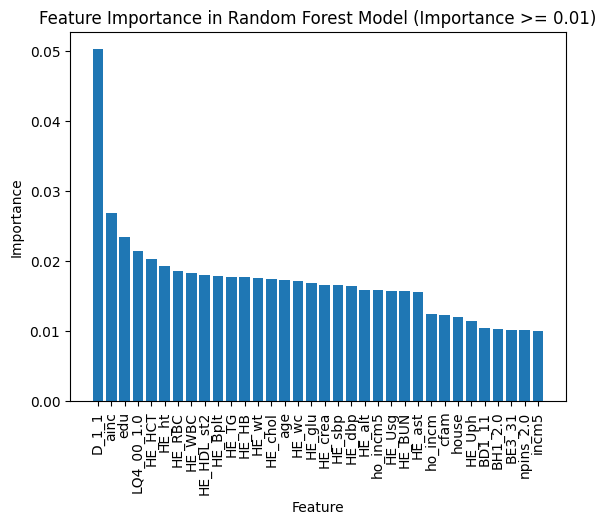

In [ ]:
top5 = ["D_1_1","ainc","LQ4_00_1.0","edu","D_2_1_1.0"]
# Feature 중요도 시각화
for i in range(2,7):
    X_drop = X_over.drop(top5[i-2], axis=1)
    feat_importance = importance(X_drop,y_over)
    plot_importance(feat_importance)


### 결론
- Random Forest를 이용하여 학습시 영향 많이 주는 속성은 없음 아마 ANN에 사용한 feature를 그대로 사용하다 보니 이렇게 된것 같다
- Kfold를 사용할때 왜 score가 점점 증가하는지 이유를 모르겠습니다.


추가로 Heatmap 분석한 부분입니다.

train_X_df의 각 feature들의 상관관계를 분석하고 depressed와 얼마나 연관이 있는지 봅니다.